In [25]:
# ------------------------
# Step 0: import Libraries
# ------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [26]:
# ------------------------
# Step 1: read the data
# ------------------------
bikes = pd.read_csv('bike_dataset.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
# ------------------------
# Step 2: Prelim Analysis and feature selection
# ------------------------
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','casual','registered','date'],axis = 1)
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [28]:
# ------------------------
# Step 2: Basic checks of missing values
# ------------------------
print(bikes_prep.isnull().sum())


season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64


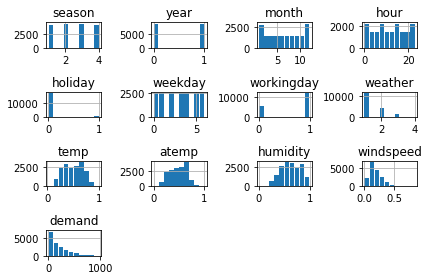

In [29]:
# ------------------------
# Step 3: Data visualization
# ------------------------
#visualize data using pandas hist
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

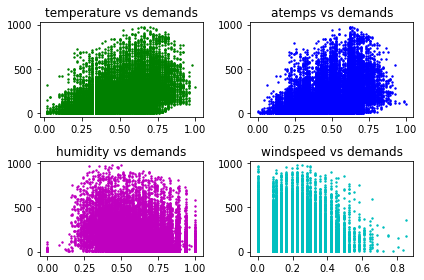

In [30]:
#important point the predict variable demand is not normally distributed
#visualize the demand vs the continuos features
plt.subplot(2,2,1)
plt.title('temperature vs demands')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'], s = 2,c = 'g')

plt.subplot(2,2,2)
plt.title('atemps vs demands')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'], s = 2, c = 'b')

plt.subplot(2,2,3)
plt.title('humidity vs demands')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'], s = 2, c = 'm')

plt.subplot(2,2,4)
plt.title('windspeed vs demands')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'], s = 2, c = 'c')
plt.tight_layout()

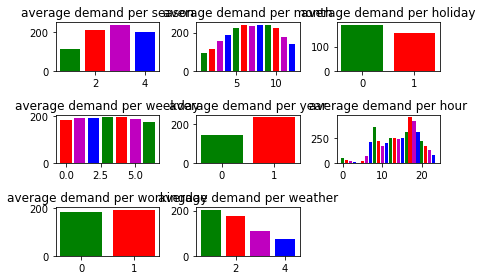

In [31]:
#in graphs we can see that there is a possible correlation between temperature and atemps
#visualize the demand vs categorical features

#creare a 3x3 subplot
colours = ['g','r','m','b']

plt.subplot(3,3,1)
plt.title('average demand per season')
#create a list of unique season's values
cat_list = bikes_prep['season'].unique()
#create avg demand per season using groupby
cat_avg = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

plt.subplot(3,3,2)
plt.title('average demand per month')
cat_list = bikes_prep['month'].unique()
cat_avg = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

plt.subplot(3,3,3)
plt.title('average demand per holiday')
cat_list = bikes_prep['holiday'].unique()
cat_avg = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

plt.subplot(3,3,4)
plt.title('average demand per weekday')
cat_list = bikes_prep['weekday'].unique()
cat_avg = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

plt.subplot(3,3,5)
plt.title('average demand per year')
cat_list = bikes_prep['year'].unique()
cat_avg = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

plt.subplot(3,3,6)
plt.title('average demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_avg = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

plt.subplot(3,3,7)
plt.title('average demand per workingday')
cat_list = bikes_prep['workingday'].unique()
cat_avg = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

plt.subplot(3,3,8)
plt.title('average demand per weather')
cat_list = bikes_prep['weather'].unique()
cat_avg = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

plt.tight_layout()

<BarContainer object of 24 artists>

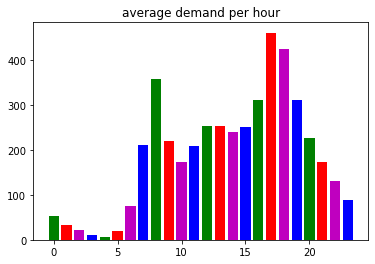

In [32]:
#feature to be dropped thanks to plotting the graph:
# weekday (not enough variation of demands in weekday)
# year (only 2 year means not enough info)
# workingday (same of weekday)
#visualize better the avg demand per hour
plt.title('average demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_avg = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg, color = colours)

In [33]:
# we can realize that we are deal with time series type data
#('demands varying in a time interval')


In [34]:
# ------------------------
# Step 4: Check the outliers
# ------------------------
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [35]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [36]:
# ------------------------
# Step 4: Check Multi Linear Regression Assumption
# ------------------------

#linearity using corr coefficient matrix using corr
correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [37]:
# correlation between temp and atemp: 
#we have to drop atemp feature for multi linear regression
# correlation between windspeed and demand: 
#we have to drop windspeed because there is no corr with demand (is useless)

#drop the columns
bikes_prep = bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis = 1)
bikes_prep.head()



,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474902, 0.4704974 , 0.49623   , 0.49404252, 0.46796122,
        0.47732234, 0.5267598 , 0.59145975, 0.6520184 , 0.7151984 ,
        0.8059134 , 0.9253133 , 1.        , 0.9253133 , 0.8059134 ,
        0.7151984 , 0.6520184 , 0.59145975, 0.5267598 , 0.47732234,
        0.46796122, 0.49404252, 0.49623   , 0.4704974 , 0.45474902],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1055004f0>)

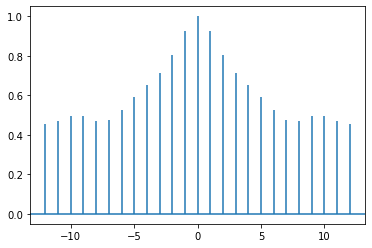

In [38]:
#check the autocorrelation in demand

df1 = pd.to_numeric(bikes_prep['demand'],downcast = 'float')
#check the autocorrelation with a maxlag of 12 (dealing with hours)
plt.acorr(df1, maxlags = 12)

In [39]:
#demand is not normal distributed: convert using log
bikes_prep['demand'] = np.log(bikes_prep['demand'])
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000


In [42]:
#autocorrelation in demand column
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']
t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']
t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']
bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3], axis = 1)

In [43]:
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [45]:
#check the types of column
bikes_prep_lag.dtypes 
#convert to category int features 
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
#we can also use cols = dataPrep.select_dtypes(include='int64').columns
#check the types of column
bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first = True)
bikes_prep_lag


,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
# ------------------------
# Step 5: Split data
# ------------------------

# demand is time dipendent or time series --> we can't do a random split
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis = 1)
tr_size = 0.7*len(X)
tr_size = int(tr_size)


X_train = X.values[0 : tr_size]
X_test = X.values[tr_size:len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size:len(Y)]
Y_train.shape
#create the size for 70% of data
                              

(12163, 1)

In [53]:
# ------------------------
# Step 6: Fit linear regression Model
# ------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
std_reg = LinearRegression()
std_reg.fit(X_train,Y_train)
r2_train = std_reg.score(X_train,Y_train)
r2_test = std_reg.score(X_test,Y_test)
Y_predict = std_reg.predict(X_test)
rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))


In [54]:
print(rmse)

0.38098800498170254


In [56]:
# ------------------------
# Final Step : RSMLE for Kaggle
# ------------------------
Y_test_e = []
Y_predict_e = []
for i in range(0,len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))
    
#do the sum of the logs and squares
log_sq_sum = 0.0
for i in range(0,len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff
    
print(math.sqrt(log_sq_sum/len(Y_test)))

    

0.35609417069801896


In [ ]:
# final score: 0.35609417069801896 